# **Pose Estimation**

Poz Kestirimi iki aşamadan oluşur:

*    Pose Detection
    
*    Pose Landmarks

Pose Detection kısmında her bir frame tespit edilir.

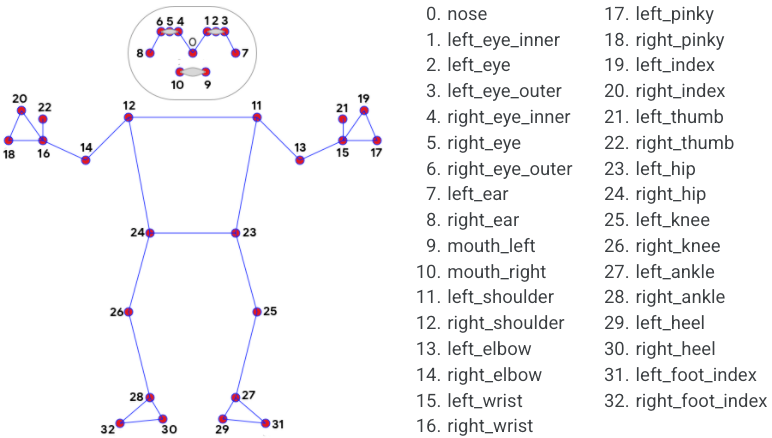

Pose Landmarks kısmında vücudun iskelet yapısı ortaya çıkartılır.

In [1]:
import cv2
import mediapipe as mp
import time

In [2]:
media_pipe_Pose = mp.solutions.pose

media_pipe_Pose objesi yaratılmıştır.

In [3]:
pose = media_pipe_Pose.Pose()

media_pipe_Pose objesinden Pose methodu pose değişkenine aktarılmıştır.

In [4]:
media_pipe_draw = mp.solutions.drawing_utils

drawing_utils ile insan üzerindeki iskelet görüntüsü elde edilir.

In [5]:
capture = cv2.VideoCapture(r"C:\Users\ilhan\Desktop\video5.mp4")
#capture = cv2.VideoCapture(0)

Videolar üzerinden ve dahili kamerayla pose estimation yapılmıştır.

In [6]:
ptime = 0

In [7]:
#video read
while True:
    ret, frame = capture.read()
    
    if ret == True:
        
        #converting bgr to rgb format
        imgRGB = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        result = pose.process(imgRGB) #mediapipe'ta görüntü işlenir.
        #print(result.pose_landmarks)
        #result, kamerada vücut göründüğünde, eklemlerin x,y,z koordinatlarını gösterir.
        
        if result.pose_landmarks:
            media_pipe_draw.draw_landmarks(frame, result.pose_landmarks, media_pipe_Pose.POSE_CONNECTIONS)
            #draw_landmarks parametresi ile iskelet yapısı çizdirilir.
            
            for id, lm in enumerate(result.pose_landmarks.landmark):
                h, w, _ = frame.shape
                cx, cy = int(lm.x*w), int(lm.y*h)
                
                if id == 13:
                    cv2.circle(frame, (cx, cy), 5, (255,0,0),cv2.FILLED)
                    #diz ve dirsekler kırıldığında spor yapıp yapmadığı anlaşılabilir.
                    #dirseklerden birine circle çizilerek dirsek olduğu belli edilmiştir.
                    
        ctime = time.time()
        fps = 1/(ctime - ptime)
        ptime = ctime    
    
        cv2.putText(frame, "FPS: "+str(int(fps)), (10,65), cv2.FONT_HERSHEY_PLAIN, 2, (255,0,0), 2)
        
        cv2.imshow('Pose Estimation',frame)
        
        if cv2.waitKey(50) & 0xFF == ord('q'):
            break

    else:
        break
        
capture.release()
cv2.destroyAllWindows()